In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
#SK LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from pickle import dump

In [2]:
df = pd.read_csv('kc_house_data_train.csv',index_col=0)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
#drop ID
df.drop(columns='id',inplace=True)

In [5]:
df.shape

#21 columns

(17290, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 20 columns):
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 2.8+ MB


In [7]:
# possibly figure out changing date column from string to date
# use months or days? 
#df['date']=pd.to_datetime(df['date'],yearfirst=True)

In [7]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [8]:
#maybe create dummy cols for view,condition,grade? 
#do we have to scale values? - sqft living, rooms
#zipcode to evaluate median income level? schools?
#lat/longitude -> near subway or park 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9406ee8d0>]],
      dtype=object)

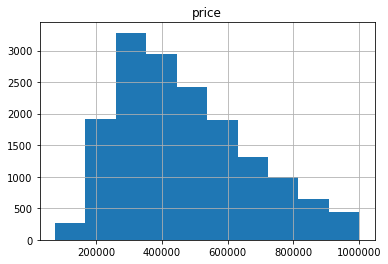

In [10]:
df=df[df['price'] <= 1000000]
#outliers 
#skews right
#cut out over 1000000 for more normal distribution
#double check this 

df.hist(column='price')

In [10]:
df['condition'].value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

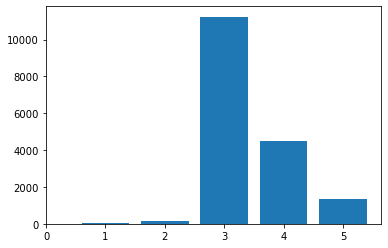

In [11]:
y = df['condition'].value_counts().values
x = df['condition'].value_counts().index
plt.bar(x, y)
plt.xticks(ticks = list(range(0, 6)));

In [12]:
#grade and waterfront should be broken out - not wf but its useful
#view and condition doesn't seem to vary much
#maybe break out view into 0 or 4? -> 0 or 1

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


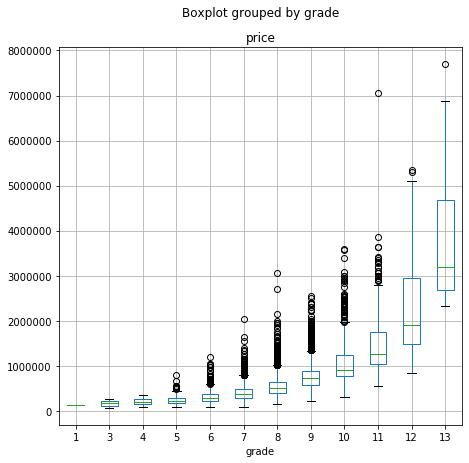

In [13]:
df.boxplot('price', by = 'grade',figsize=(7,7))

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


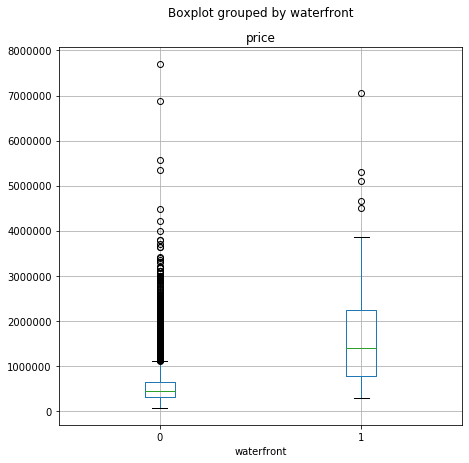

In [14]:
df.boxplot('price', by = 'waterfront',figsize=(7,7))

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


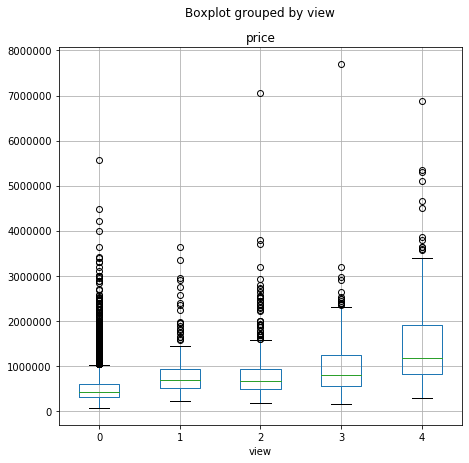

In [15]:
df.boxplot('price', by = 'view',figsize=(7,7))

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


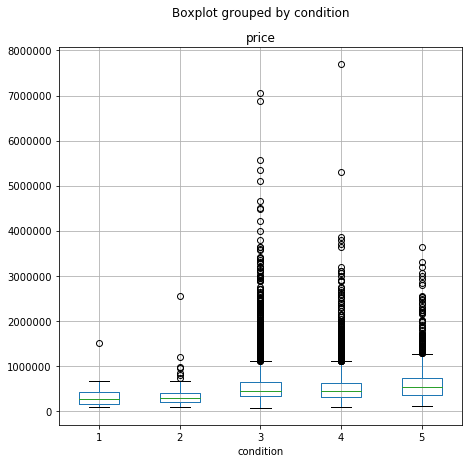

In [16]:
df.boxplot('price', by = 'condition',figsize=(7,7))

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


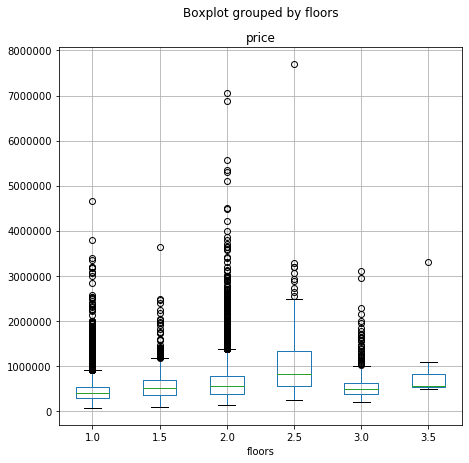

In [17]:
df.boxplot('price', by = 'floors',figsize=(7,7))
#look into

In [18]:
corr=df.corr()

In [19]:
corr



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125
grade,0.666215,0.354679,0.664191,0.762929,0.110320,0.458984,0.092234,0.249554,-0.142066,1.000000,0.758247,0.165003,0.448003,0.007988,-0.184946,0.116196,0.198369,0.715745,0.116062


In [20]:
A =['price', 'bedrooms', 'bathrooms', 'floors', 'view', 'grade']

In [21]:
type(df.isnull().sum())

pandas.core.series.Series

In [22]:
df1 = df[A]

In [23]:
corr1 = df1.corr()

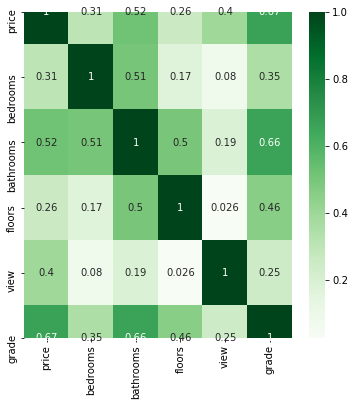

In [24]:
fig,ax=plt.subplots(figsize=(6,6))
# sns.heatmap(corr,cmap="BuPu",annot=True)
sns.heatmap(corr1,cmap="Greens",annot=True)

# sns.heatmap(corr)

In [25]:
corr[abs(corr > 0.70)] #easier to pick out highly correlated
#sqft living and sqft above highly correlated?
#sqft living and bedroom/bath highly correlated?

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00000,NaN,NaN,0.703540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.00000,0.755270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,0.70354,NaN,0.75527,1.000000,NaN,NaN,NaN,NaN,NaN,0.762929,0.876696,NaN,NaN,NaN,NaN,NaN,NaN,0.755066,NaN
sqft_lot,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.701875
floors,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,0.762929,NaN,NaN,NaN,NaN,NaN,1.000000,0.758247,NaN,NaN,NaN,NaN,NaN,NaN,0.715745,NaN


In [26]:
df.corr()['price'].sort_values()

zipcode         -0.048958
long             0.019327
condition        0.036099
yr_built         0.056450
sqft_lot15       0.081423
sqft_lot         0.086803
yr_renovated     0.117770
floors           0.256985
waterfront       0.275779
lat              0.302394
bedrooms         0.305106
sqft_basement    0.323312
view             0.395485
bathrooms        0.524335
sqft_living15    0.585567
sqft_above       0.607760
grade            0.666215
sqft_living      0.703540
price            1.000000
Name: price, dtype: float64

In [27]:
df['yr_renovated'].value_counts()
#possibly break out to 0 and 1

0       16564
2014       71
2007       32
2005       32
2000       31
2013       30
2003       28
2006       21
1990       21
1989       21
2004       19
2002       19
1987       16
1999       16
1995       16
1998       15
2010       15
1991       15
1985       15
2009       15
1986       14
1996       14
1993       14
2001       13
1994       13
2008       13
1984       12
1988       12
2015       12
1983       11
1997       10
2012        9
1992        9
2011        8
1980        7
1982        7
1970        7
1979        7
1968        6
1977        6
1975        5
1978        5
1964        4
1973        4
1965        4
1955        3
1953        3
1981        3
1972        3
1976        3
1958        3
1945        3
1960        3
1963        3
1957        2
1962        2
1967        2
1969        2
1950        2
1971        2
1974        2
1940        2
1956        2
1946        2
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, dtype: int64

In [65]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old', 'yr_since_reno'],
      dtype='object')

In [68]:
# df.dat/

In [89]:
features = [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above',
       'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
len(features)

11

In [90]:
from sklearn.preprocessing import StandardScaler
x = df.loc[:, features].values

In [91]:
x = StandardScaler().fit_transform(x)

In [93]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = PrincipalComponents, columns = ["pc1", 'pc2', 'pc3', 'pc4',
                           'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
                           'pc11'])

In [101]:
pca.explained_variance_ratio_

array([3.70022222e-01, 1.63433236e-01, 1.30547123e-01, 9.10669746e-02,
       7.20533181e-02, 5.36784227e-02, 4.67998903e-02, 2.71529226e-02,
       2.44956177e-02, 2.07502726e-02, 9.04228939e-33])

In [95]:
pca.explained_variance_


array([4.07047987e+00, 1.79786958e+00, 1.43610141e+00, 1.00179466e+00,
       7.92632343e-01, 5.90496802e-01, 5.14828570e-01, 2.98699424e-01,
       2.69467380e-01, 2.28266201e-01, 9.94709364e-32])

In [96]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[4.07047987e+00 1.79786958e+00 1.43610141e+00 1.00179466e+00
 7.92632343e-01 5.90496802e-01 5.14828570e-01 2.98699424e-01
 2.69467380e-01 2.28266201e-01 9.94709364e-32]
[[ 3.11257889e-01  4.14320930e-01  4.63983090e-01  1.30019820e-01
   2.50966801e-01  4.48100656e-01  1.24740094e-01  1.06994913e-02
   1.95467163e-01  4.02998686e-01  1.38574079e-01]
 [-1.86984918e-01 -1.46447769e-01 -1.06405101e-01  5.94268342e-01
  -7.60124660e-02  9.43083923e-03 -2.38553276e-01 -2.27830008e-01
   3.22997940e-01 -2.03922645e-02  5.99740157e-01]
 [ 1.82021180e-01 -2.00488067e-02  1.41539411e-01  2.21917582e-01
  -5.25465099e-01 -2.10901832e-01  6.88505297e-01  1.04341980e-01
  -2.07671228e-01  1.65097421e-02  2.19694470e-01]
 [-2.20629883e-01 -1.67246679e-02 -9.47641506e-03  1.98891714e-01
   2.28546075e-01  3.35904537e-02 -8.25312287e-02  8.72099744e-01
  -2.38237293e-01  9.37364417e-03  1.83899853e-01]
 [ 8.58279730e-02  1.68282047e-01  1.19324614e-02  2.18770447e-01
   3.92003953e-01  1.19633793e-02

In [97]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
structure_loading = pc1 * np.sqrt(eig_values[0])
str_loading = pd.Series(structure_loading, index = features)
str_loading.sort_values(ascending=False)

sqft_living      0.936106
sqft_above       0.904062
bathrooms        0.835910
sqft_living15    0.813067
bedrooms         0.627976
floors           0.506336
long             0.394363
sqft_lot15       0.279579
sqft_lot         0.262321
sqft_basement    0.251669
lat              0.021587
dtype: float64

In [ ]:
p

Text(0, 0.5, 'proportion of explained variance')

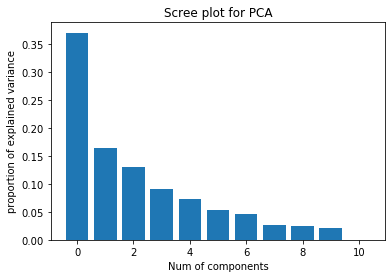

In [99]:
index = np.arange(11)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

In [28]:
test1 = ols(formula = 'price~bedrooms+bathrooms+yr_built+waterfront+grade+sqft_living',data=df).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     5204.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:35:49   Log-Likelihood:            -2.3744e+05
No. Observations:               17290   AIC:                         4.749e+05
Df Residuals:                   17283   BIC:                         4.750e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     6.89e+06   1.34e+05     51.464      0.000    6.63e+06    7.15e+06
bedrooms    -4.015e+04   2272.503    -17.667      0.000   -4.46e+04   -3.57e+04
bathrooms    5.569e+04   3796.134     14.671      0.000    4.83e+04    6.31e+04
yr_built    -3912.9844     70.521    -55.487      0.000   -4051.213   -3774.756
waterfront   7.316e+05   1.93e+04     37.940      0.000    6.94e+05    7.69e+05
grade        1.312e+05   2407.569     54.505      0.000    1.27e+05    1.36e+05
sqft_living   177.8996      3.675     48.407      0.000     170.696     185.103
==============================================================================
Omnibus:                    13249.104   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           963363.853
Skew:                           3.100   Prob(JB):                         0.00
Kurtosis:                      39.039   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
df.isnull().sum() #no nulls

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

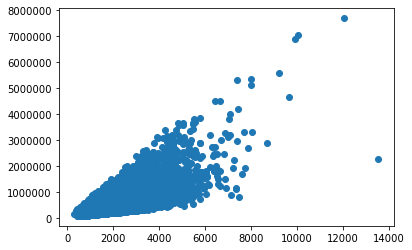

In [30]:
plt.scatter(df['sqft_living'],df['price'])

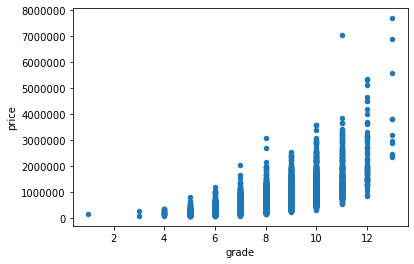

In [31]:
df.plot.scatter(x='grade',y='price')
#ok numbers represent order 


In [32]:
#df['date'] = df['date'].astype(str) #drop this?

In [33]:
#df['date'] = pd.to_datetime(df['date'], format='%y%m%d.T000000')

In [34]:
df['yr_old'] =  df['yr_built'].map(lambda x: 2016-x)

In [35]:
df['yr_old'].describe() #shows years old of each house

count    17290.000000
mean        45.207981
std         29.343516
min          1.000000
25%         20.000000
50%         42.000000
75%         65.000000
max        116.000000
Name: yr_old, dtype: float64

In [36]:
df['yr_since_reno'] =  df['yr_renovated'].map(lambda x: 2016-x if x > 0 else 0)

In [37]:
df['yr_since_reno'].value_counts()

0     16564
2        71
9        32
11       32
16       31
3        30
13       28
10       21
26       21
27       21
14       19
12       19
21       16
29       16
17       16
18       15
7        15
31       15
25       15
6        15
23       14
30       14
20       14
15       13
8        13
22       13
28       12
1        12
32       12
33       11
19       10
4         9
24        9
5         8
37        7
46        7
36        7
34        7
48        6
39        6
38        5
41        5
51        4
43        4
52        4
61        3
44        3
58        3
35        3
63        3
40        3
53        3
71        3
56        3
47        2
60        2
54        2
45        2
66        2
42        2
76        2
49        2
59        2
70        2
72        1
65        1
82        1
68        1
57        1
Name: yr_since_reno, dtype: int64

In [38]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,yr_since_reno
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,30,0
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,39,0
2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,19,0
3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,26,0
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,12,0


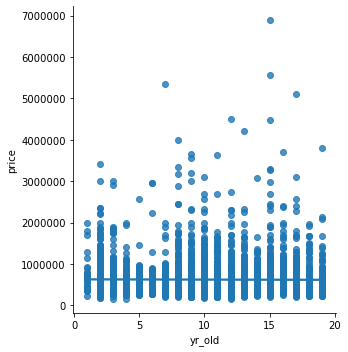

In [39]:
#visualizing price and yr old.... linear? 
sns.lmplot(x='yr_old',y='price',data=df[df['yr_old']<20],fit_reg=True)

In [40]:
features=['bedrooms','bathrooms','sqft_living','grade','yr_old','waterfront','sqft_lot','floors','yr_since_reno']

In [41]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

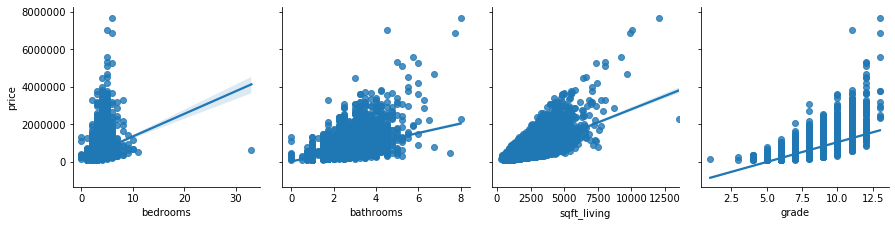

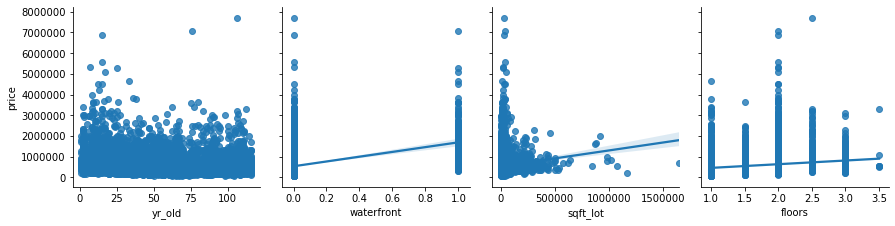

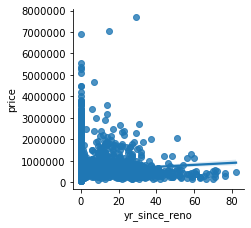

In [42]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)

In [43]:
df['zipcode'].nunique()

70

In [44]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,yr_since_reno
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,30,0
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,39,0
2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,19,0
3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,26,0
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,12,0


In [45]:
df2=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','zipcode','yr_old','yr_since_reno']]

In [46]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,yr_old,yr_since_reno
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,98058,30,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,98115,39,0
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,98006,19,0
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,98034,26,0
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,98052,12,0


In [47]:
zipcode_dummy = pd.get_dummies(df2['zipcode'],prefix = 'zip', drop_first=True)
df2 = pd.concat([df2, zipcode_dummy], axis = 1)

In [48]:
pd.set_option('display.max_columns', 100)

In [49]:
df2.drop(columns='zipcode',inplace=True)

In [50]:
df2['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [51]:
df2['bedrooms']=df2['bedrooms'].map(lambda x: x if x < 15 else 15)

In [52]:
df2['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
15       1
11       1
Name: bedrooms, dtype: int64

In [53]:
target=df2.price

In [54]:
features_cols=list(df2.columns)

In [55]:
features_cols=features_cols[1:]

In [56]:
len(features_cols)


80

In [57]:
features2=df2[features_cols]

In [58]:
features2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_old,yr_since_reno,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,4,2.25,2070,8893,2.0,0,0,4,8,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,3.00,2900,6730,1.0,0,0,5,8,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,2.50,3770,10893,2.0,0,2,3,11,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3.50,4560,14608,2.0,0,2,3,12,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2.50,2550,5376,2.0,0,0,3,9,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5,2.50,3240,9960,1.0,0,1,3,8,58,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,2,1.75,1300,4000,2.0,0,0,3,7,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,3,1.00,1050,9876,1.0,0,0,3,7,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,3,1.50,1900,43186,1.5,0,0,4,7,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
polynomial_features_2= PolynomialFeatures(degree=2)
x_poly = polynomial_features_2.fit_transform(features2)

In [60]:
corr2=df2.corr()

In [61]:
corr2[abs(corr2 > 0.70)]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_old,yr_since_reno,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
price,1.00000,NaN,NaN,0.703540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.00000,0.755270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,0.70354,NaN,0.75527,1.000000,NaN,NaN,NaN,NaN,NaN,0.762929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,0.762929,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [62]:
df2.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_old,yr_since_reno,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
price,1.000000,0.312512,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,-0.056450,0.063583,-0.079096,-0.076717,0.270366,0.064889,0.124801,0.012829,0.030831,-0.020349,-0.013093,-0.017358,-0.027669,-0.065326,-0.104858,0.008269,0.024946,-0.021943,0.024313,-0.070984,-0.072183,-0.059959,0.101606,-0.007262,-0.075885,0.219701,0.199329,-0.098235,-0.029724,0.047366,0.050565,-0.069471,-0.044213,-0.075343,-0.018443,-0.004379,-0.009161,0.007813,0.058627,0.087974,0.035470,-0.069836,0.071764,0.021747,0.087568,-0.074458,0.012757,-0.046430,0.063122,0.174365,0.032511,0.024873,0.012703,-0.053841,0.082551,0.024683,-0.024139,-0.039607,-0.063628,0.007550,0.027147,-0.056960,-0.035934,-0.045335,-0.018183,-0.090086,0.034662,-0.068552,-0.053705,-0.071636,0.082508
bedrooms,0.312512,1.000000,0.521232,0.585410,0.030365,0.178379,-0.008696,0.082105,0.023128,0.364273,-0.158575,-0.012862,-0.006864,0.000447,0.062422,0.045787,0.074017,0.035964,0.046720,-0.003371,0.021856,-0.030248,0.000791,-0.028657,0.006105,-0.002210,0.023316,0.013355,0.006950,0.015514,0.016032,-0.003492,0.033896,0.019119,0.012226,0.038986,0.083352,0.002405,-0.019101,0.048304,-0.023902,-0.013832,0.008780,0.024815,0.054513,0.017229,-0.049172,0.006917,0.039469,0.066706,0.030030,0.015230,-0.004385,-0.057303,0.018463,-0.039905,-0.049759,-0.020413,-0.011347,0.017489,-0.030326,-0.040418,-0.062468,-0.050322,-0.007747,-0.023600,-0.023023,-0.074411,-0.035514,-0.048811,-0.009138,-0.030582,-0.011371,-0.008069,0.001948,-0.048910,-0.005076,-0.004476,0.002005,-0.022369,-0.017850
bathrooms,0.524335,0.521232,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,-0.507761,-0.003215,-0.035276,-0.006688,0.063574,0.035874,0.084277,-0.000814,-0.003502,-0.002339,0.019811,-0.006951,0.023270,-0.027909,-0.007720,0.008248,0.062953,0.004856,0.073427,0.005777,0.007067,-0.043440,0.043280,-0.001771,0.057948,0.074034,0.085932,0.000315,-0.002021,0.055599,0.061576,-0.020051,-0.011074,-0.004629,0.045467,0.064034,-0.019234,0.018583,0.075742,0.100488,0.044893,0.024563,0.013876,-0.039425,0.006254,-0.050031,-0.011072,-0.021908,0.004009,0.039079,-0.054201,-0.022431,-0.065963,-0.078765,0.012849,-0.008465,-0.049597,-0.069901,-0.074667,-0.031203,-0.002798,-0.075138,-0.024964,-0.059397,-0.025861,-0.099287,-0.008345,-0.052207,-0.024140,-0.050653,0.010962
sqft_living,0.703540,0.585410,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,-0.319397,0.017473,-0.048220,-0.017726,0.113783,0.058706,0.128092,0.000534,0.005764,0.006015,0.016749,0.002062,0.012361,-0.030438,-0.014144,0.018768,0.060564,0.006449,0.029388,-0.012867,-0.015812,-0.031718,0.049177,-0.018771,0.013965,0.096565,0.125568,-0.021005,-0.006935,0.053267,0.081287,-0.033504,-0.007597,-0.006954,0.052684,0.062005,-0.014292,0.033239,0.088892,0.128044,0.082587,0.019379,0.012326,-0.075749,0.010088,-0.080578,-0.058582,-0.038305,-0.000166,0.055769,-0.046046,-0.031276,-0.074852,-0.071109,-0.005669,-0.039003,-0.044765,-0.073066,-0.076949,-0.041202,-0.013726,-0.057380,-0.026674,-0.048775,0.001784,-0.074257,0.015918,-0.041365,-0.025332,-0.041584,0.013689
sqft_lot,0.086803,0.030365,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.

In [63]:
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features2, target, random_state=22,test_size=0.2)


In [64]:
#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

-565825.1810472517
[-3.19999320e+04  1.68610616e+04  1.96286508e+02  2.07837623e-01
 -1.12133667e+04  6.80057154e+05  4.98154018e+04  1.84079310e+04
  6.36779213e+04  1.01414459e+03 -3.73430635e+02  2.36966373e+04
 -3.02422635e+04  7.80174377e+05  2.74298489e+05  2.46049011e+05
  2.30616325e+05  2.27089512e+05  5.85972610e+04  1.15599397e+05
  9.37188494e+04  7.39716365e+04 -1.20700283e+04 -4.47032307e+04
  1.56463614e+05  1.50576348e+05  1.08204813e+05  1.96544077e+05
 -6.14224057e+02  4.90464617e+03  4.01233519e+03  3.59562207e+05
  1.91641733e+05  2.94274089e+04  1.42141457e+06  4.93658470e+05
  8.64312231e+03  8.54386878e+04  2.16768623e+05  1.97289980e+05
  3.57303388e+04  8.60269771e+04  2.63315933e+04  9.12712062e+04
  8.54956072e+04 -2.07329342e+04  1.45855098e+05  1.66626055e+05
  1.69054710e+05  1.19221314e+05 -4.34024674e+04  4.97843602e+05
  3.12875016e+05  4.25011039e+05  1.22614797e+05  3.05355437e+05
  9.76174724e+04  4.38270186e+05  5.84704870e+05  2.95759153e+05
  2.59

In [60]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.8199706966421144


In [61]:
y_train_pred = lm.predict(X_train)

In [62]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 61595.41135620291
Mean Squared Error: 6942313757.511776
Root Mean Squared Error: 83320.54823098426


In [63]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.31340815336549027
Root Mean Squared Error: 0.42394942388583184


In [64]:
y_pred = lm.predict(X_test)

In [65]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.8285113166695376


Text(0, 0.5, 'Predictions')

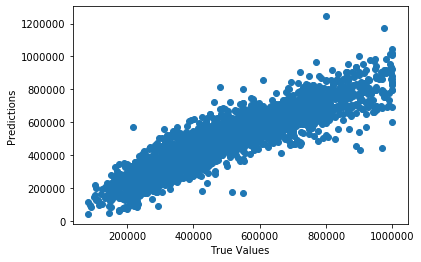

In [66]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

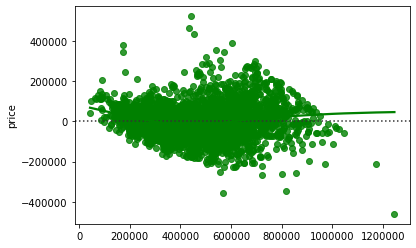

In [67]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [68]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:60036.858274636674
Mean Squared Error:6662674426.919395
Root Mean Squared Error:81625.2070559052


In [69]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.30547796453387405
Root Mean Squared Error Z: 0.4153232334715275


In [70]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  83320 vs. Testing:  81625


In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled =pd.DataFrame(data=scaler.transform(X_train), columns=features_cols)
X_test_scaled =pd.DataFrame(data=scaler.transform(X_test), columns=features_cols)

In [72]:
#saving scaler

dump(scaler,open('scaler.pkl','wb'))

In [73]:
X_train_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_old,yr_since_reno,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0.748320,0.297626,0.410520,-0.123417,-0.873621,-0.053629,-0.264139,-0.625611,-0.497937,-0.185945,-0.152266,-0.10128,-0.121273,-0.078989,-0.087935,-0.136795,-0.085669,-0.113117,-0.069489,-0.097704,-0.080952,-0.096893,-0.111702,6.124821,-0.059817,-0.141142,-0.117262,-0.11995,-0.111346,-0.114861,-0.077989,-0.132620,-0.164268,-0.167475,-0.01969,-0.085209,-0.16352,-0.103215,-0.168451,-0.137967,-0.115896,-0.14785,-0.151905,-0.149755,-0.125481,-0.075434,-0.11658,-0.144252,-0.12675,-0.098108,-0.136501,-0.061744,-0.168936,-0.087486,-0.132317,-0.114166,-0.09851,-0.064225,-0.087035,-0.165013,-0.122582,-0.162267,-0.158196,-0.086582,-0.119283,-0.139995,-0.131099,-0.159988,-0.112412,-0.121273,-0.121273,-0.051402,-0.146476,-0.106984,-0.119617,-0.114514,-0.116922,-0.081917,-0.118276,-0.119617
1,-0.363603,-0.411379,-0.315658,-0.230091,-0.873621,-0.053629,-0.264139,0.920678,0.490886,0.951361,-0.152266,-0.10128,-0.121273,-0.078989,-0.087935,-0.136795,-0.085669,-0.113117,-0.069489,-0.097704,-0.080952,-0.096893,-0.111702,-0.163270,-0.059817,-0.141142,-0.117262,-0.11995,-0.111346,-0.114861,-0.077989,-0.132620,-0.164268,-0.167475,-0.01969,-0.085209,-0.16352,-0.103215,-0.168451,-0.137967,-0.115896,-0.14785,-0.151905,-0.149755,-0.125481,-0.075434,-0.11658,-0.144252,-0.12675,-0.098108,-0.136501,-0.061744,-0.168936,-0.087486,-0.132317,-0.114166,-0.09851,-0.064225,-0.087035,-0.165013,-0.122582,-0.162267,-0.158196,-0.086582,-0.119283,-0.139995,-0.131099,-0.159988,-0.112412,-0.121273,-0.121273,-0.051402,-0.146476,-0.106984,-0.119617,-0.114514,-0.116922,-0.081917,-0.118276,8.360030
2,-0.363603,0.652129,0.080439,-0.174976,0.995764,-0.053629,-0.264139,0.920678,0.490886,-0.358264,-0.152266,-0.10128,-0.121273,-0.078989,-0.087935,-0.136795,-0.085669,-0.113117,-0.069489,-0.097704,-0.080952,-0.096893,-0.111702,-0.163270,-0.059817,-0.141142,-0.117262,-0.11995,-0.111346,-0.114861,-0.077989,7.540325,-0.164268,-0.167475,-0.01969,-0.085209,-0.16352,-0.103215,-0.168451,-0.137967,-0.115896,-0.14785,-0.151905,-0.149755,-0.125481,-0.075434,-0.11658,-0.144252,-0.12675,-0.098108,-0.136501,-0.061744,-0.168936,-0.087486,-0.132317,-0.114166,-0.09851,-0.064225,-0.087035,-0.165013,-0.122582,-0.162267,-0.158196,-0.086582,-0.119283,-0.139995,-0.131099,-0.159988,-0.112412,-0.121273,-0.121273,-0.051402,-0.146476,-0.106984,-0.119617,-0.114514,-0.116922,-0.081917,-0.118276,-0.119617
3,-0.363603,-1.474888,-1.015428,0.311552,-0.873621,-0.053629,-0.264139,2.466967,-0.497937,0.951361,5.224562,-0.10128,-0.121273,-0.078989,-0.087935,-0.136795,-0.085669,-0.113117,-0.069489,-0.097704,-0.080952,-0.096893,-0.111702,-0.163270,-0.059817,-0.141142,-0.117262,-0.11995,-0.111346,-0.114861,-0.077989,-0.132620,-0.164268,-0.167475,-0.01969,-0.085209,-0.16352,-0.103215,-0.168451,-0.137967,-0.115896,-0.14785,-0.151905,6.677582,-0.125481,-0.075434,-0.11658,-0.144252,-0.12675,-0.098108,-0.136501,-0.061744,-0.168936,-0.087486,-0.132317,-0.114166,-0.09851,-0.064225,-0.087035,-0.165013,-0.122582,-0.162267,-0.158196,-0.086582,-0.119283,-0.139995,-0.131099,-0.159988,-0.112412,-0.121273,-0.121273,-0.051402,-0.146476,-0.106984,-0.119617,-0.114514,-0.116922,-0.081917,-0.118276,-0.119617
4,-0.363603,-0.056877,-0.896599,-0.187767,-0.873621,

In [74]:
#instantiate a linear regression object
lm2 = LinearRegression()

#fit the linear regression to the data
lm2 = lm2.fit(X_train_scaled, y_train)

y_train_pred_scaled = lm2.predict(X_train_scaled)



train_rmse_scaled = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_scaled))

train_mae_scaled = metrics.mean_absolute_error(y_train, y_train_pred_scaled)
train_mse_scaled= metrics.mean_squared_error(y_train, y_train_pred_scaled)
train_rmse_scaled = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_scaled))

print('Mean Absolute Error:', train_mae_scaled )
print('Mean Squared Error:',  train_mse_scaled )
print('Root Mean Squared Error:' , train_rmse_scaled)

Mean Absolute Error: 61595.4113562248
Mean Squared Error: 6942313757.511778
Root Mean Squared Error: 83320.54823098428


In [75]:
y_predz=lm2.predict(X_test_scaled)

In [76]:
test_rmse_scaled50 = np.sqrt(metrics.mean_squared_error(y_test, y_predz))

In [77]:
test_rmse_scaled50

81625.20705595604

In [78]:
#save the model
dump(lm2,open('lm2.pkl','wb'))

In [79]:
print(lm2.coef_)

[-3.45670023e+03  6.19543183e+03  7.89465842e+04  1.13229427e+04
  1.28917182e+03  7.43860065e+03  1.68306571e+04  1.23918695e+04
  5.20486973e+04  1.74553951e+04  6.06378504e+02 -3.93559266e+01
 -1.29925702e+03  3.86221306e+04  2.79265442e+04  3.61397060e+04
  2.06008572e+04  2.65384770e+04  6.44091740e+03  1.48586121e+04
  8.40952906e+03  9.87664140e+03  4.11880112e+02 -3.01058677e+03
  9.72765223e+03  2.63220729e+04  1.56176714e+04  2.74534044e+04
  5.56347307e+02  9.65895101e+02 -8.47722386e+02  3.91155824e+04
  2.88325322e+04  7.45714486e+03  1.29440447e+04  3.42502978e+04
  2.70440782e+03  1.09837900e+04  4.20889571e+04  3.48906770e+04
  4.12536526e+03  1.48881172e+04  6.26141553e+03  1.57289153e+04
  1.81884563e+04  8.61428425e+03  2.02820793e+04  3.28203353e+04
  3.19797769e+04  1.85282324e+04 -1.10066079e+03  2.22170643e+04
  4.82962571e+04  2.98953336e+04  1.28240476e+04  3.25224261e+04
  9.23064684e+03  2.30426156e+04  3.29959994e+04  4.61513106e+04
  3.29511088e+04  4.47614

In [80]:
len(X_train_scaled.columns)



80

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
#VIF selection method -> no features appear to be too highly correlated with eachother
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif["features"] = X_train_scaled.columns
vif.round(1)

,VIF Factor,features
0,1.7,bedrooms
1,2.9,bathrooms
2,3.7,sqft_living
3,1.2,sqft_lot
4,1.9,floors
5,1.2,waterfront
6,1.2,view
7,1.3,condition
8,2.8,grade
9,3.0,yr_old


In [83]:
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()

In [84]:
#recursive wrapper method

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train_scaled, y_train)



RFECV(cv=10, estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [85]:
selected_columns = X_train_scaled.columns[selector.support_]
removed_columns = X_train_scaled.columns[~selector.support_]

In [86]:
list(removed_columns)

['floors',
 'yr_since_reno',
 'zip_98002',
 'zip_98003',
 'zip_98022',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98092']

In [87]:
list(selected_columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_old',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199']

In [88]:
len(X_train_scaled.columns)

80

In [89]:
lm_rfe = LinearRegression()

lm_rfe = lm_rfe.fit(X_train_scaled[selected_columns], y_train)

y_rfe=lm_rfe.predict(X_train_scaled[selected_columns])

trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))

print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test_scaled[selected_columns])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print("Train RMSE", int(trainRFE_rmse), "Test RMSE: ", int(testRFE_rmse))

Training Root Mean Squared Error: 83358.22231345238
Testing Root Mean Squared Error: 81655.27094981128
Train RMSE 83358 Test RMSE:  81655


In [90]:
#Root Mean Squared Error: 82832.19193504081

In [91]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)

train_rmse_lasso = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse_lasso) )
print('Testing Error: '+ str(test_rmse_lasso) )



Training Error: 61595.393953411214
Testing Error: 81625.22733093888


In [92]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train_scaled.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
#lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))
lasso_coef01.T

,0
zip_98023,-18963.788135
zip_98032,-10967.625134
zip_98003,-10903.827943
zip_98092,-8246.404472
bedrooms,-3843.791640
zip_98002,-424.910598
sqft_lot,0.279598
sqft_living,104.234715
yr_since_reno,120.732636
yr_old,601.608366


In [93]:
X_train_scaled2=X_train_scaled.drop(columns='sqft_lot')

In [94]:
len(X_train_scaled2.columns)

79

In [95]:
X_test_scaled2=X_test_scaled.drop(columns='sqft_lot')

In [96]:
#instantiate a linear regression object
lm3 = linear_model.LinearRegression()

#fit the linear regression to the data
lm3 = lm3.fit(X_train_scaled2, y_train)

y_train_pred_scaled2 = lm3.predict(X_train_scaled2)



train_rmse_scaled2 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_scaled2))

train_mae_scaled2 = metrics.mean_absolute_error(y_train, y_train_pred_scaled2)
train_mse_scaled2= metrics.mean_squared_error(y_train, y_train_pred_scaled2)
train_rmse_scaled2 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_scaled2))

print('Mean Absolute Error:', train_mae_scaled2 )
print('Mean Squared Error:',  train_mse_scaled2 )
print('Root Mean Squared Error:' , train_rmse_scaled2)


print(lm3.intercept_)
print(lm3.coef_)

Mean Absolute Error: 62086.864708547815
Mean Squared Error: 7049794842.430018
Root Mean Squared Error: 83963.05641429461
467161.62122151605
[-4215.97214147  5889.91136508 80986.36836921   771.2648901
  7055.90496396 17429.2523218  12228.93561352 52410.37692857
 18440.24850451   608.89205544  -233.25986329 -1518.81132826
 38449.66915735 27756.73304872 35777.07814347 20412.2748143
 26246.50000348  7020.16443706 14682.72385194  9815.74624565
 10362.24527893  1919.01973891 -3296.7567149  10871.82401121
 26977.35206221 15386.0778698  27171.51303336   505.60865284
   897.54486342  -977.43111319 38801.4766855  28485.67813047
  7953.45962206 12905.07883346 33988.14385485  2824.04117891
 11835.70774043 41724.69692778 35272.50974677  3895.31800281
 14585.57843947  6236.39776061 15634.36955044 18069.89664685
 10182.18850054 20532.42554332 32512.44246833 31818.964825
 19446.72829797  -360.96667087 21974.32000123 47688.88857293
 29533.80991618 12491.47597469 32125.73364777  8894.07906758
 22734.088

In [97]:
#Original train Root Mean Squared Error: 82832.19193504081

In [98]:
y_pred_scaled2_test = lm3.predict(X_test_scaled2)

test_rmse_scaled2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_scaled2_test))

print('Testing Root Mean Squared Error:' , test_rmse_scaled2)

Testing Root Mean Squared Error: 82647.9073007789


In [99]:
#original test RMSE 83570

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
#polynomial transformation of features - degree 2
#did this above

#polynomial_features= PolynomialFeatures(degree=2)
#x_poly = polynomial_features.fit_transform(X_train_scaled)

SyntaxError: invalid syntax (<ipython-input-101-0d0466027ee8>, line 2)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_scaled, y_train)
y_poly_pred = poly_model.predict(X_train_scaled)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)
print(rmse)
print(r2)

In [ ]:
## The line / model #scatter of poly test model 
plt.scatter(y_test, y_poly_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
#polynomial_features3= PolynomialFeatures(degree=3)
#x_poly3 = polynomial_features3.fit_transform(X_train_scaled)


In [ ]:
#poly_model3 = LinearRegression()
#poly_model3.fit(x_poly3, y_train)
#y_poly_pred3 = poly_model3.predict(x_poly3)

In [ ]:
#rmse3 = np.sqrt(mean_squared_error(y_train,y_poly_pred3))
#r23 = r2_score(y_train,y_poly_pred3)
#print(rmse3)
#print(r23)


In [ ]:
#overfitting? #transform before split, or do fit_transform
#x_poly_test=polynomial_features.fit_transform(X_test) already did this on all data

In [ ]:
y_poly_pred_test=poly_model.predict(X_test_scaled)

In [ ]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_poly_pred_test))
r2_test = r2_score(y_test, y_poly_pred_test)
  

In [ ]:
print(rmse_test)

In [ ]:
print(r2_test)

In [ ]:
y_pred_test_poly = poly_model.predict(x_poly_test)

test_rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_poly))

print('Testing Root Mean Squared Error:' , test_rmse_poly)